# Project Utopian Vision 
By Team Pollyana

## Idea:

The United Nations General Assembly approved a proposal to upgrade Nepal from the least developed country category to the developing country category by December 2026.

As the stakes are high and time is limited, there is no room for mistakes while conducting developmental activities. Unplanned development conducted in developing countries like Nepal for a very long period of time has become problematic in organizing and planning the developmental works. Long-run development and sustainability have become major concerns in the process of infrastructural and structural development in such countries. At the present we have two choices in order to achieve this :
First, demolish the unplanned structures and replan the development starting all over again. Secondly, we can improvise on what we have. The former one could be a better idea for developing a utopian nation. But the question is, “Is it really possible?”
No, it isn’t ... especially for a country like Nepal which almost took a decade to overcome the earthquake destruction. Improvising on what we have seems to be the most practical choice.
But another question arises here, If improvisations could have been made then why aren’t the developing countries taking necessary initiatives? We had conducted some research and found that governmental and non-governmental organizations were not as concerned about these issues as they should be. The public is not aware of the impacts created by these unplanned developmental activities in the long term. If we do not stop now and continue practicing unplanned development then the impacts caused would be irreversible. For example: If industries are constructed on land suitable for agriculture then solving that issue would take another century. Therefore, this is the time to take action and change the face of development. Where do we start from? It is not feasible for the government to enforce new rules on the citizens within a short period of time for the purpose of planned development. However, the government can still work on the infrastructures they are going to build in the public areas.Our team looks forward to simplifying this planning process.

Our Idea
Our team has come up with the idea of creating an online map locating the appropriate areas for the developmental works following the principles of sustainable development with the vision of creating a utopian nation.UV, our web application, is built on top of react js frontend with Django as backend.
GeoPandas is used for processing whereas the map turf library of npm is used for the mapping purpose in react js.
Sustainable development is the major motto of this project. We are eager to help the government establish planned cities having access to essential facilities and services without compromising the environmental condition.In the current context, there are several governmental places that can be utilized for the construction of parks, hospitals, and schools. In order to locate these appropriate areas, a community is considered as a point and circular buffer zone with an appropriate radius with center at that point being drawn. Appropriate areas for the proposed infrastructures such as hospitals, schools and parks are located according to this reference point. A governmental area that lies at the intersection of the maximum number of buffer zones needs to have a hospital if there doesn’t exist one near 5 km. Schools should be constructed far from the industrial area and highways in quiet spaces within a radius of 1.63 km from the point, one park per community should be constructed, proper management of waste and easily accessible public toilets should be constructed through analysis. We are going to map all the governmental areas and analyze the free spaces available for developmental works. The map will not just contain proposed places but also addresses the need for proposed infrastructures suitable there.
Therefore, UV is an innovation that strives towards development of a utopian nation.

## Problem to be Adressed:

Sustainable development is the long-term development of improving the quality of life in a city, including ecological, cultural, political, institutional, social, and economic components without leaving a burden over the future generations. For sustainable development, a nation should follow certain development criteria. But, even in the 21st era, sustainable development is only limited to the pages of 5th graders' books, because of the ignorance of governmental and non governmental organization and unawareness of people about the long term benefits. The result of all the ignorance is the unplanned development which does not take sustainable development’s criterias into consideration. Due to this, there are different problems that can occur which can be solved if we plan for a better city by considering sustainable development criteria.
The criteria required for sustainable development are:

### Health:

Health is an important aspect of any human’s life. Health determines how a human functions in his/her day-to-day life. An essential requirement of maintaining good health is hospitals. Hospitals in sustainable cities should be within a reachable distance from any community. A hospital should be easily accessible by roadways.WHO recommends that any health facility from a community should be within a 5 km distance.

### Education:

Despite the Sustainable Development Goal to have every child in school and learning by 2030, there are still 260 million children who don't go to primary or secondary school. It is not beyond our power to create a world in which all children have access to a good education. As Nelson Mandala stated, a world where each and every one of the children has access to a good education is definitely possible. So, accessibility to a good education is a must in a sustainable city. Sabean (2007) on reviewing the distance from home to school suggested that for school students, the maximum distance from home to school should be 3 kilometers. A school within a reachable distance is not the only criteria to be fulfilled, there should also be enough students in a school.

### Green Parks:

In the hectic life of the 21st-century, people lack social interactions. Due to less social interaction, people are suffering from different disorders and lack social skills. A 2018 study from Harvard Chan School followed more than 9,000 U.S. adolescents ages 12-18. It showed that adolescents who live in areas surrounded by green space had a lower chance of depressive symptoms than those living in dense urban areas. To address this issue, a sustainable city should have green parks, children's playgrounds, and old age recreational parks in each community.

### Public Toilets:

Access to sustainable and safe public sanitation improves hygiene practices, which leads to improved health and quality of life for men and women. Public sanitation should be easily available in parks, parking areas, and places where public vehicles stop for the passengers to get on board and disembark.

### Landfills:

In the context of underdeveloped countries, there is no proper urban planning and coordination among concerned authorities which eventually affects our ecological diversity, environment and health. In unplanned planning there is rapid urbanization and industrialization growth which limits access to basic infrastructure, hospitals, and quality essential services as mentioned above. Our web application will inform people about the possible development necessary in their community and also provides factual information for governmental and non governmental organization, so they can work towards achieving sustainable development.


===============================================================================================================================

# Importing all the necessary API's

- Geopandas: Extension of Pandas to do geospatial analysis includes numpy, matplotlib and ... 
- Matplotlib: Matplotlib is for plotting the graph
- Pandas: For normal data manipulation in dataframe
- Shapely: To read shapes, we have majorly used for finding out the centroid of different shapes
- SciKit Learn: Library for machine learning algorithms used to implement DbScan and KMeans

In [413]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely import geometry as gm
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib as plot
from sklearn.cluster import KMeans
import numpy as np
import random as rnd
from sklearn.cluster import DBSCAN
warnings.filterwarnings('ignore')

# Data Reading
We can get osm data from https://download.geofabrik.de/.
It includes files of points, roads, relations, and all the values in osm map

## How is data stored in OSM ?
For example:
- Building are stored as a polygon type having areas
- Hospitals are stored as point
- Roads are stored as lines with continuous relations
- etc.

## As we use pandas to read csv file we can use gpd for reading shape files

In [414]:
points = gpd.read_file(r"SampleShapeFile/shape/points.shp")
points=points.to_crs('epsg:32644')
roads = gpd.read_file(r"SampleShapeFile/shape/roads.shp")
roads=roads.to_crs('epsg:32644')

# Importing data of hospitals

# Earth is not completely sphere so cannot be represented in spherical coordinated system. So is representaed in datum format. 
There are different datum formats.
Funfact: Nepal also have it's own datum format named .

In [415]:
hospitals= gpd.GeoDataFrame(points.loc[[1]],crs={'init':'epsg:32644'})
j=0
for i in range(len(points)): 
    if points.loc[i]['type'] == "hospital":
        hospitals=hospitals.append(points.loc[i])

# Plotting the data of Hospitals in the given area

<Axes: title={'center': 'Hopitals in given Specific area'}>

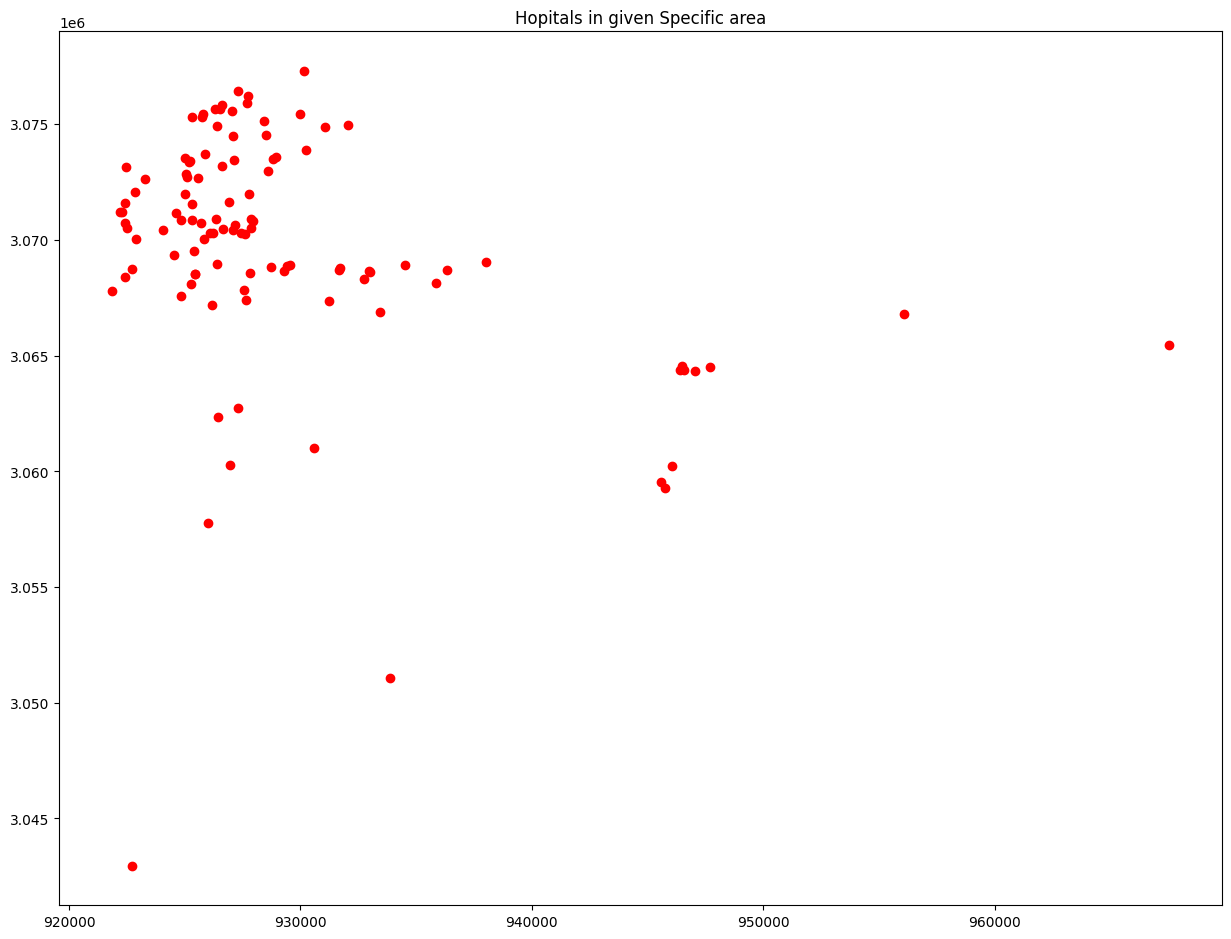

In [416]:
figure,ax1 = plt.subplots(figsize=(15,15))
plt.title("Hopitals in given Specific area")
hospitals.plot(ax=ax1,color='red')

# Consturcting the buffer of 5km around the hospitals as the area around that is easily accesible from it

In [417]:
buffer_zone1=hospitals.buffer(5000)

<Axes: >

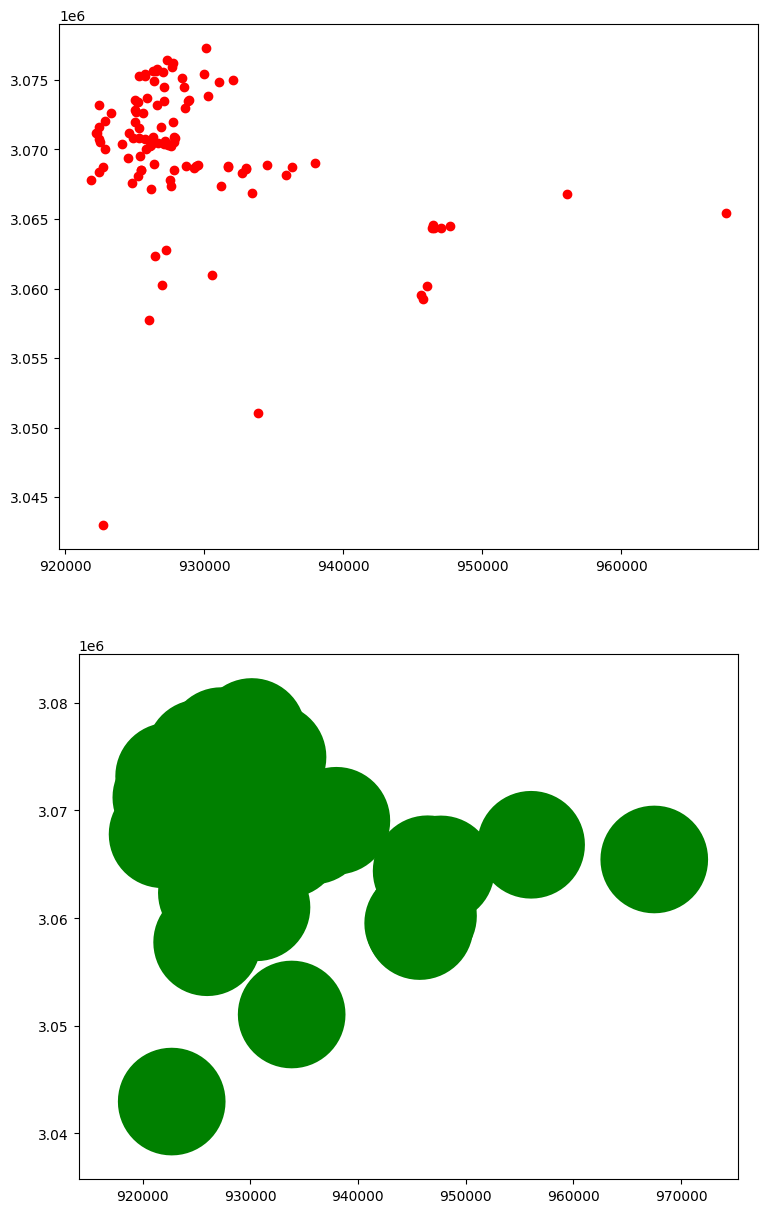

In [418]:
figure,(ax1,ax2)=plt.subplots(2,figsize=(15,15))
plt.title("Hospitals with buffer of 5km")
hospitals.plot(ax=ax1,color='red')
hospitals.plot(ax=ax2,color='blue')
buffer_zone1.plot(ax=ax2,color='green')

# Calculating the area of buffer zone to know the area that is covered by hospitals

In [ ]:
total_area=sum(buffer_zone1.area)
print(f"Total area covered by hospital is: {total_area} km")

# Merging all the buffer zone. Union of all

In [420]:
buffer_zone1=gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer_zone1))

In [421]:
buffer_zone1.drop_duplicates(inplace=True)

In [422]:
index = pd.Index(range(0,107))
buffer_zone1=buffer_zone1.set_index(index)
buffer_zone1


,geometry
0,"POLYGON ((940856.281 3068130.457, 940832.205 3..."
1,"POLYGON ((930220.208 3073407.789, 930196.131 3..."
2,"POLYGON ((950735.389 3059262.432, 950711.313 3..."
3,"POLYGON ((928278.237 3072617.774, 928254.161 3..."
4,"POLYGON ((951563.950 3064361.937, 951539.874 3..."
...,...
102,"POLYGON ((927433.543 3068372.762, 927409.467 3..."
103,"POLYGON ((927707.064 3068747.144, 927682.987 3..."
104,"POLYGON ((931614.902 3073195.150, 931590.826 3..."
105,"POLYGON ((951474.921 3064538.613, 951450.844 3..."


In [423]:
merged=buffer_zone1.loc[[0]]

In [424]:
for i in range(len(buffer_zone1)):
    merged=gpd.overlay(merged,buffer_zone1.loc[[i]],how='union')
    merged['column']=1
    merged=merged.dissolve()
    merged.crs='epsg:32644'

In [425]:
merged

,geometry,column
0,"MULTIPOLYGON (((921256.292 3038177.409, 920794...",1


In [426]:
olygon=gm.Polygon([[85.271,27.413],[85.868,27.408],[85.877,27.75],[85.272,27.753]])

In [427]:
d = { 'geometry': [olygon]}
rectangle=gpd.GeoDataFrame(d,crs={'init':'epsg:4326'})

# Ploting the total area taken as input

<Axes: >

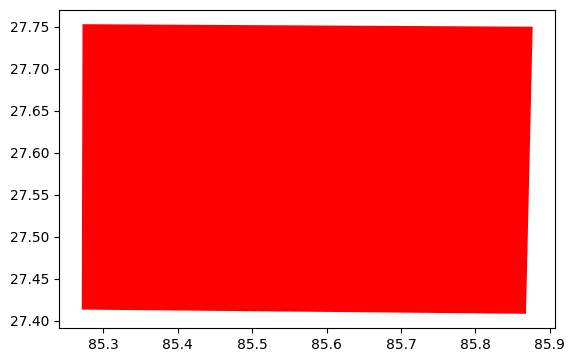

In [428]:
rectangle.plot(color='red')

In [429]:
rectangle=rectangle.to_crs('epsg:32644')

<Axes: >

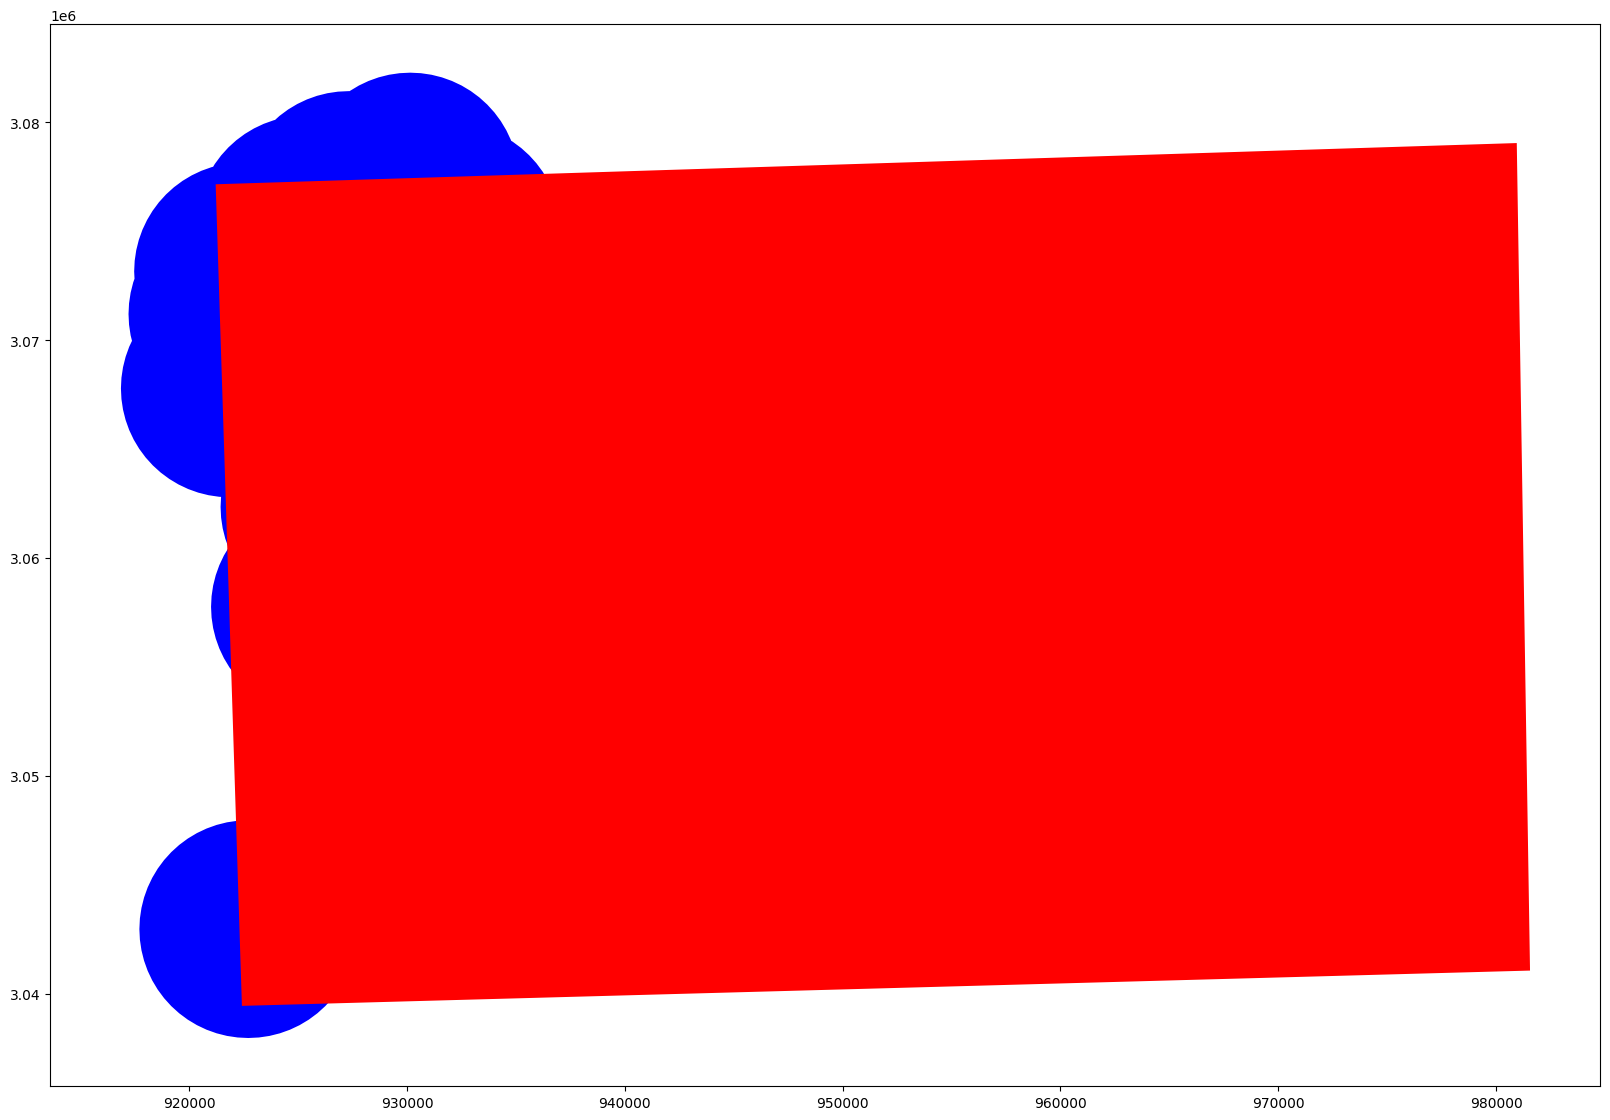

In [430]:
figure,ax=plt.subplots(figsize=(20,20))
merged.plot(ax=ax,color='blue')
rectangle.plot(ax=ax,color="red")

# Merged area

<Axes: >

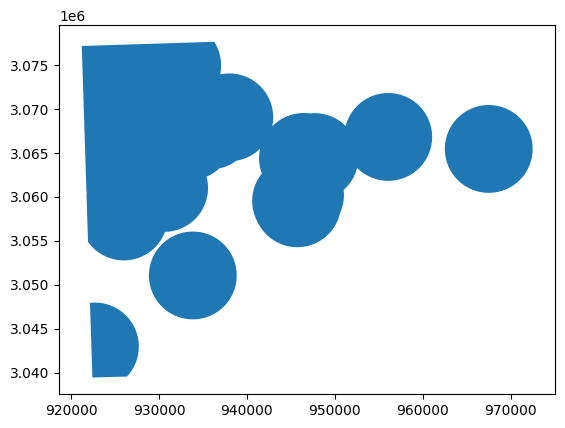

In [431]:
buffer_in_rectangle=gpd.clip(merged,rectangle)
buffer_in_rectangle.plot()

# Total area not covered by the hospital

In [432]:
non_buffer=gpd.overlay(rectangle,merged,how='difference')

<Axes: >

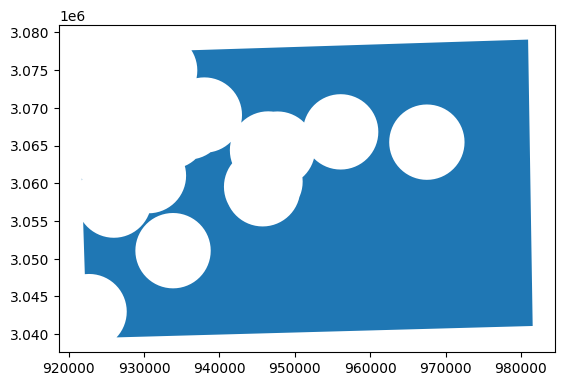

In [433]:
non_buffer.plot()

# Percentage of are not covered with area for information

In [434]:
percentage=(merged.area)/(rectangle.area)*100
print("The percetange of total area with buffer_zone is {}".format(percentage))

The percetange of total area with buffer_zone is 0    42.000346
dtype: float64


# Reading data of Buildings

In [435]:
buildings = gpd.read_file(r"SampleShapeFile/shape/buildings.shp")

In [436]:
buildings=buildings.to_crs('epsg:32644')
buildings=buildings.iloc[100000:200000]

In [437]:
buildings_in_rectangle=gpd.clip(buildings,rectangle)

In [438]:
buildings

,osm_id,name,type,geometry
100000,337555876,NaN,NaN,"POLYGON ((924453.759 3071734.725, 924452.059 3..."
100001,337555879,NaN,NaN,"POLYGON ((924419.612 3071751.327, 924418.974 3..."
100002,337555881,NaN,NaN,"POLYGON ((924410.497 3071748.753, 924409.213 3..."
100003,337555882,NaN,NaN,"POLYGON ((924453.998 3071718.304, 924462.844 3..."
100004,337557429,NaN,NaN,"POLYGON ((924870.431 3071242.758, 924875.066 3..."
...,...,...,...,...
199995,342219304,NaN,NaN,"POLYGON ((969268.803 3062803.145, 969267.498 3..."
199996,342219305,NaN,NaN,"POLYGON ((969183.939 3063207.850, 969179.362 3..."
199997,342219306,NaN,NaN,"POLYGON ((968159.093 3063142.299, 968150.944 3..."
199998,342219307,NaN,NaN,"POLYGON ((969364.968 3063185.503, 969358.819 3..."


In [439]:
buildings_in_rectangle

,osm_id,name,type,geometry
116244,341173069,NaN,NaN,"LINESTRING (922512.205 3039445.731, 922518.225..."
116241,341173059,NaN,NaN,"POLYGON ((922438.821 3039471.965, 922434.919 3..."
116226,341173008,NaN,NaN,"POLYGON ((922443.055 3039482.307, 922445.952 3..."
116248,341173082,NaN,NaN,"POLYGON ((922700.179 3039484.909, 922700.768 3..."
116232,341173023,NaN,NaN,"POLYGON ((922716.011 3039488.031, 922718.656 3..."
...,...,...,...,...
116898,341193597,NaN,NaN,"POLYGON ((980786.796 3078950.235, 980788.497 3..."
116510,341181385,NaN,house,"POLYGON ((980237.364 3078955.420, 980239.984 3..."
116872,341193513,NaN,NaN,"POLYGON ((980815.751 3078952.619, 980817.193 3..."
116896,341193593,NaN,NaN,"POLYGON ((980840.198 3078969.132, 980832.871 3..."


In [440]:
buildings_in_buffer=gpd.clip(buildings,buffer_in_rectangle)

In [441]:
buildings_in_buffer

,osm_id,name,type,geometry
116244,341173069,NaN,NaN,"LINESTRING (922512.205 3039445.731, 922518.225..."
116241,341173059,NaN,NaN,"POLYGON ((922438.821 3039471.965, 922434.919 3..."
116226,341173008,NaN,NaN,"POLYGON ((922443.055 3039482.307, 922445.952 3..."
116248,341173082,NaN,NaN,"POLYGON ((922700.179 3039484.909, 922700.768 3..."
116232,341173023,NaN,NaN,"POLYGON ((922716.011 3039488.031, 922718.656 3..."
...,...,...,...,...
180453,341940001,NaN,NaN,"POLYGON ((947524.829 3069193.096, 947530.546 3..."
180452,341940000,NaN,NaN,"POLYGON ((947479.778 3069222.072, 947483.134 3..."
180448,341939995,NaN,NaN,"POLYGON ((947322.156 3069278.727, 947330.863 3..."
180360,341939603,NaN,NaN,"POLYGON ((946793.467 3069279.549, 946797.230 3..."


In [442]:
percentage_of_buildings_in_buffer=len(buildings_in_buffer)/len(buildings_in_rectangle)*100

In [443]:
print(percentage_of_buildings_in_buffer)

65.53593215592936


# Overlaying building over the buffer

<Axes: >

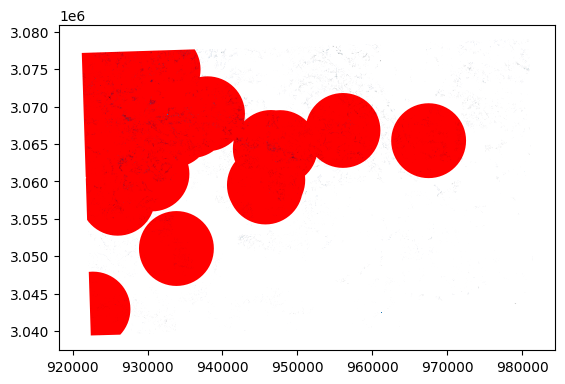

In [444]:
figure,ax=plt.subplots()
buffer_in_rectangle.plot(ax=ax,color="red",markersize=0.001)
buildings.plot(ax=ax,markersize=5)

In [445]:
buildings_outsidse_buffer=gpd.clip(buildings_in_rectangle,non_buffer)

# Buildings that are not availabe in accessible area

<Axes: >

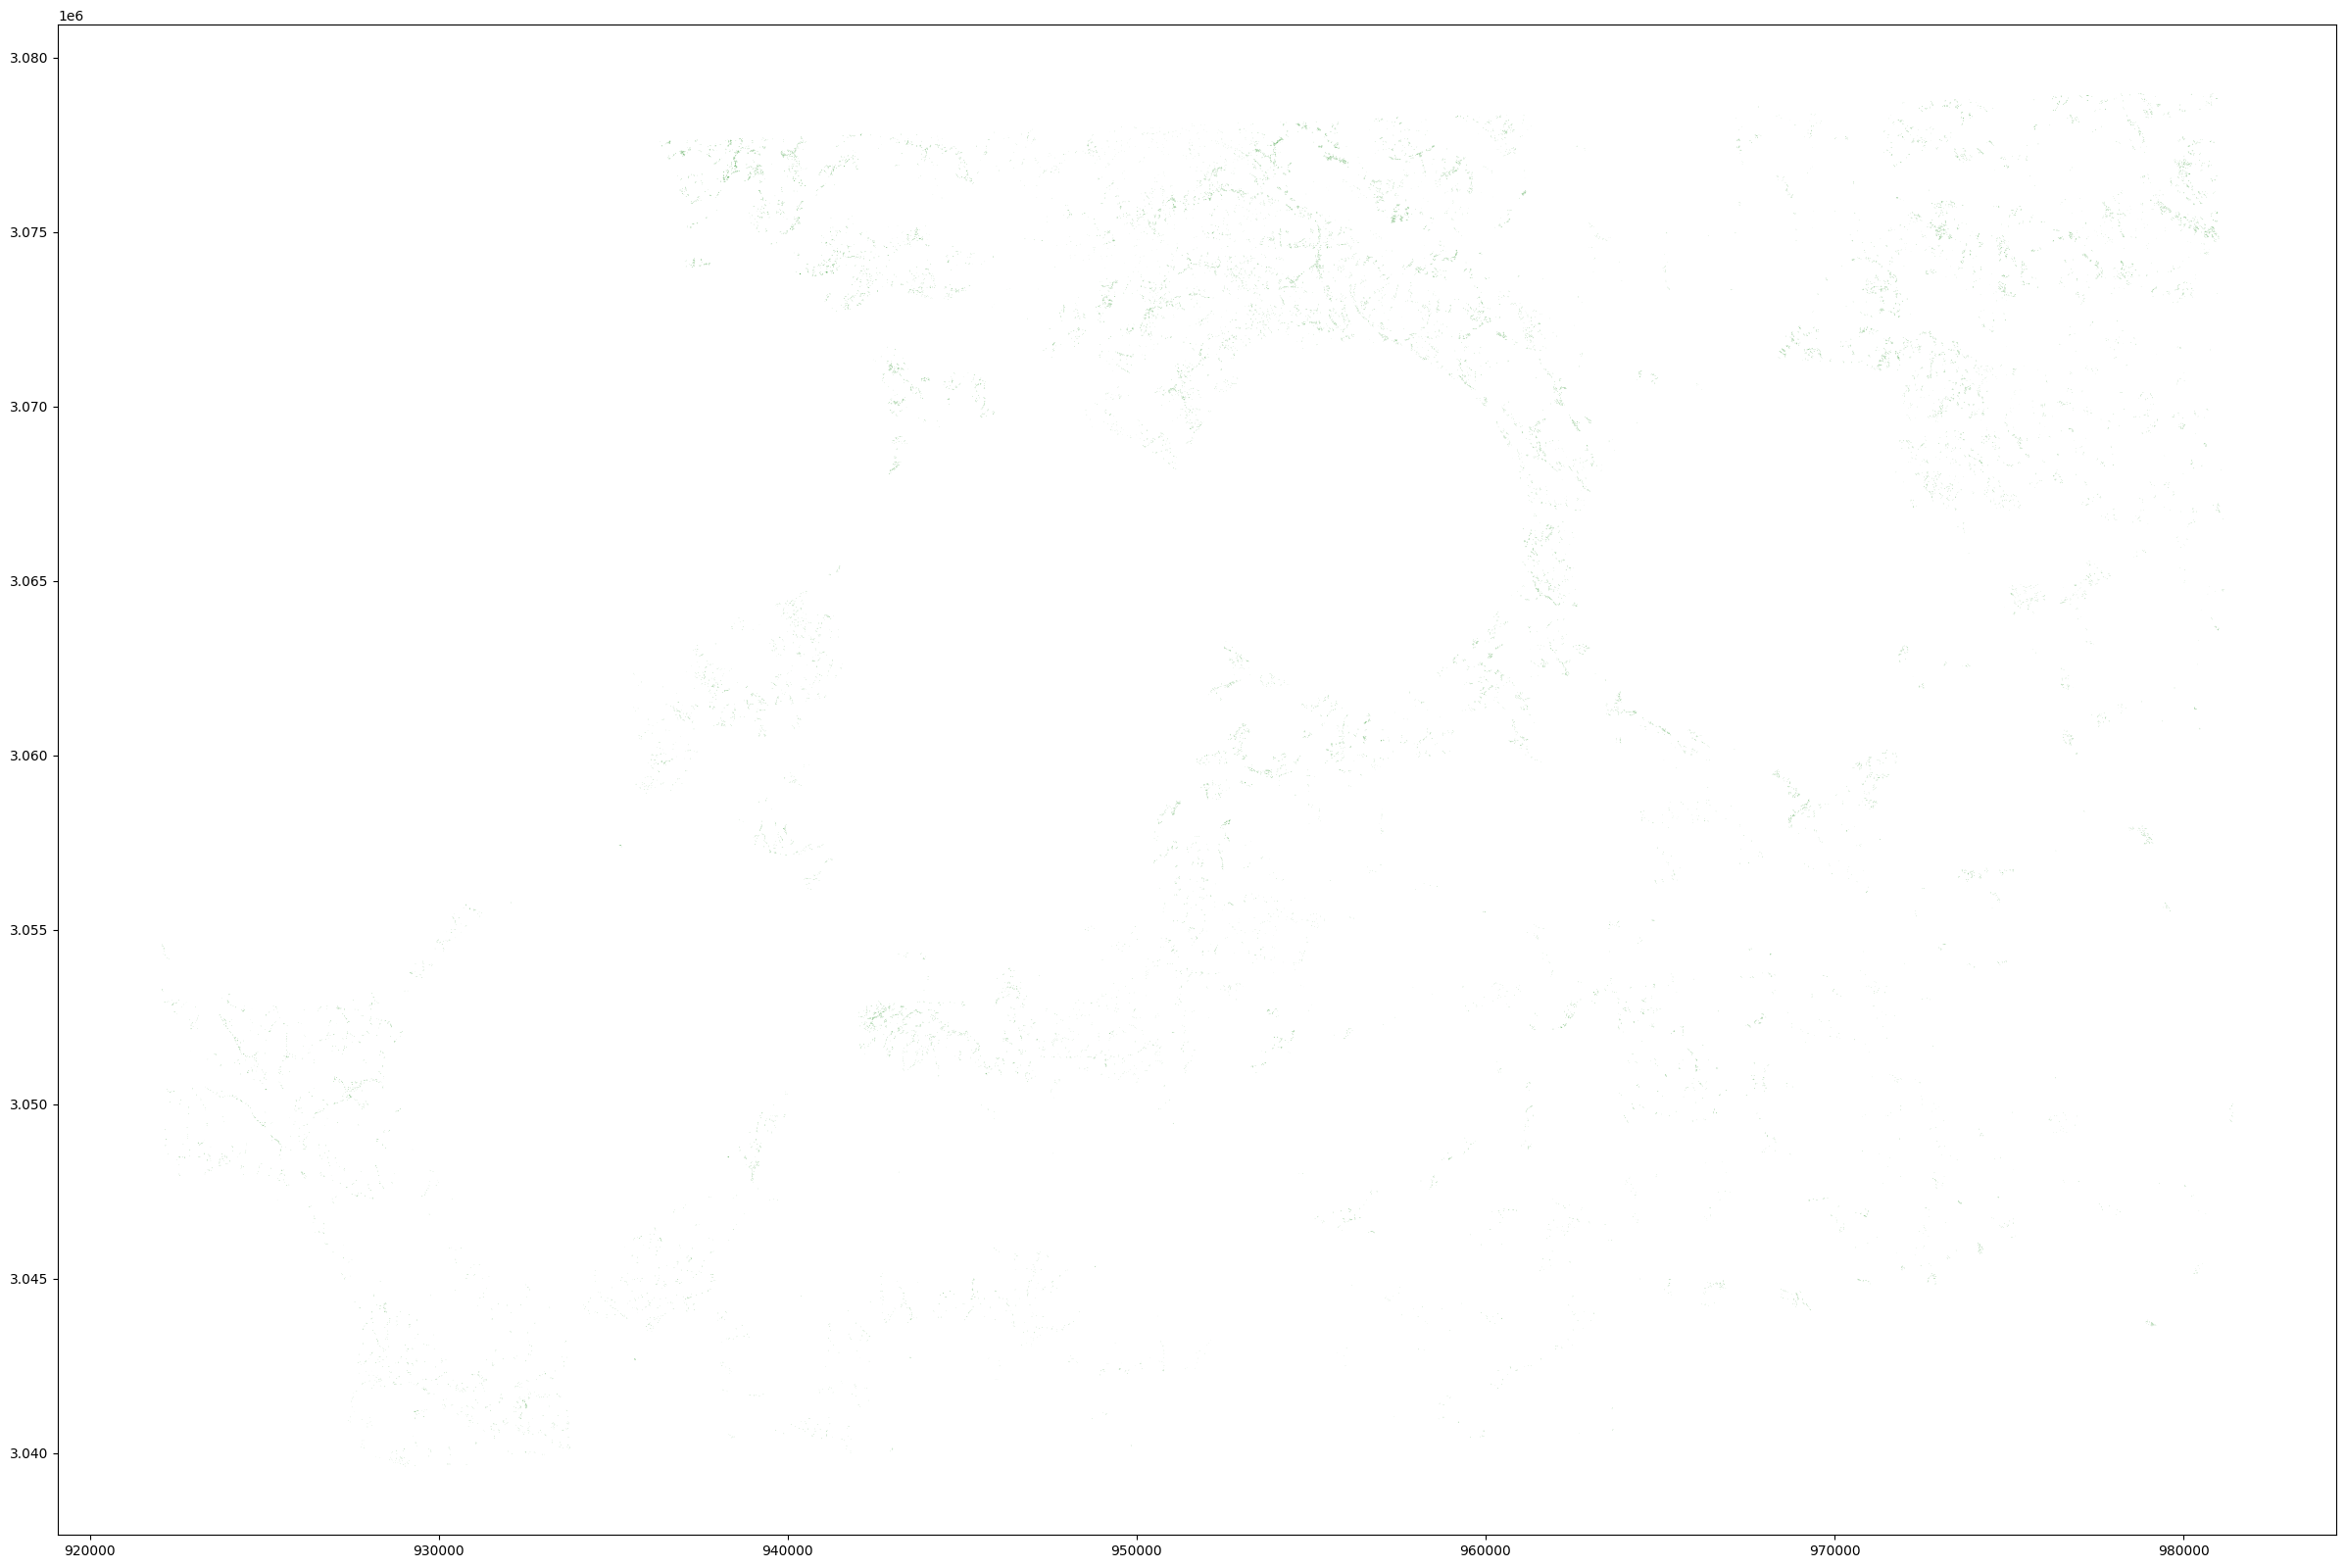

In [446]:
figure,ax1=plt.subplots(figsize=(30,30))
buildings_outsidse_buffer.plot(ax=ax1,color="green",markersize=200)

In [447]:
buildings_in_lat=buildings_outsidse_buffer.to_crs("epsg:4326")

In [448]:
buildings_in_lat['geometry']

197960    POLYGON ((85.30362 27.48254, 85.30358 27.48253...
108931    POLYGON ((85.30456 27.48748, 85.30444 27.48745...
108932    POLYGON ((85.30425 27.48748, 85.30420 27.48753...
108493    POLYGON ((85.30151 27.48879, 85.30144 27.48881...
108492    POLYGON ((85.30152 27.48891, 85.30141 27.48889...
                                ...                        
116898    POLYGON ((85.87530 27.74909, 85.87525 27.74907...
116510    POLYGON ((85.86976 27.74929, 85.86957 27.74924...
116872    POLYGON ((85.87559 27.74909, 85.87550 27.74907...
116896    POLYGON ((85.87576 27.74923, 85.87573 27.74928...
116888    POLYGON ((85.87588 27.74927, 85.87588 27.74931...
Name: geometry, Length: 34552, dtype: geometry

<Axes: >

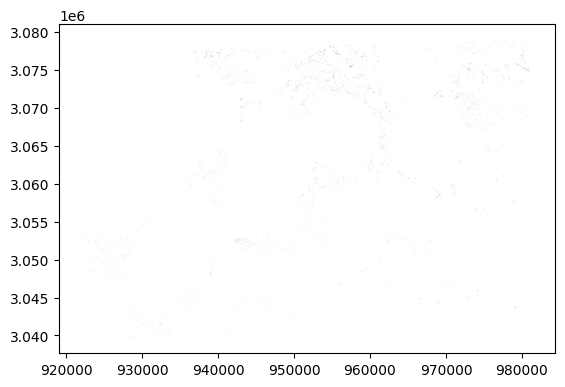

In [449]:
buildings_outsidse_buffer.plot()

In [450]:
buildings_outsidse_buffer['geometry']=buildings_outsidse_buffer['geometry'].centroid

<Axes: >

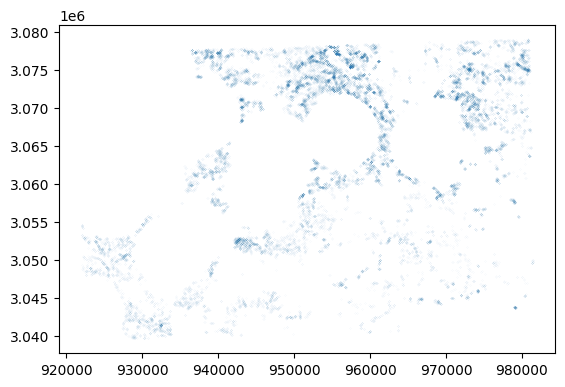

In [451]:
buildings_outsidse_buffer.plot(markersize=0.0002)

In [452]:
buildings_in_lat=buildings_outsidse_buffer.to_crs("epsg:4326")

<Axes: >

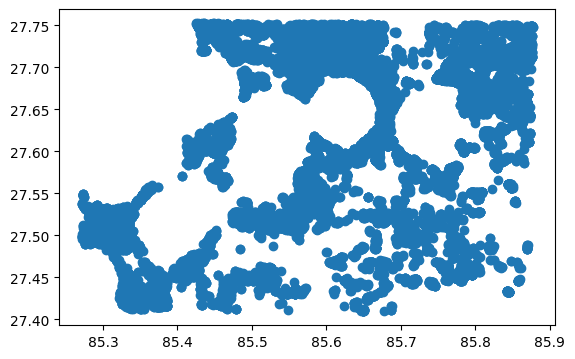

In [453]:
buildings_in_lat.plot()

In [454]:
col1=[]
col2=[]
index=pd.Index(range(len(buildings_in_lat)))
buildings_in_lat=buildings_in_lat.set_index(index)

In [455]:
for i in range(len(buildings_in_lat)):
    x=float(buildings_in_lat['geometry'].loc[[i]].x)
    y=float(buildings_in_lat['geometry'].loc[[i]].y)
    col1.append(x)
    col2.append(y)

In [456]:
d={'x':col1,'y':col2}


In [457]:
data=pd.DataFrame(data=d)

# Using K-Means clustering to cluster the available buildings and finding its centroid and representing it as a individual point

In [458]:
km=KMeans(n_clusters=150)
km.fit(data[['x','y']])
x=km.cluster_centers_
x=pd.DataFrame(x,columns=['x','y'])

In [459]:
x

,x,y
0,85.641731,27.742993
1,85.403758,27.452544
2,85.844533,27.645189
3,85.557960,27.513397
4,85.476583,27.716973
...,...,...
145,85.838816,27.674632
146,85.657653,27.682347
147,85.602971,27.728074
148,85.687079,27.658030


In [460]:
x_cord=x['x']
y_cord=x['y']
geometry=[]
xPoint = gm.Point()
for i in range(len(x_cord)):
    xPoint=gm.Point(x_cord[i],y_cord[i])
    geometry.append(xPoint)

# All the custered Points

<Axes: >

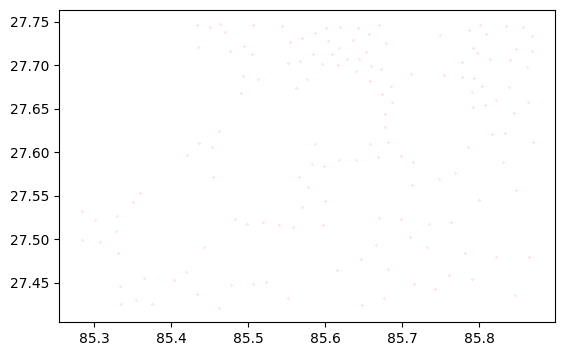

In [461]:
points={'geometry':geometry}
Locations=gpd.GeoDataFrame(points,crs={'init':'epsg:4326'})
Locations.plot(color="red",markersize=0.01)

# Displaying Clusteres of building that are not avaible in accesible zone

<Axes: >

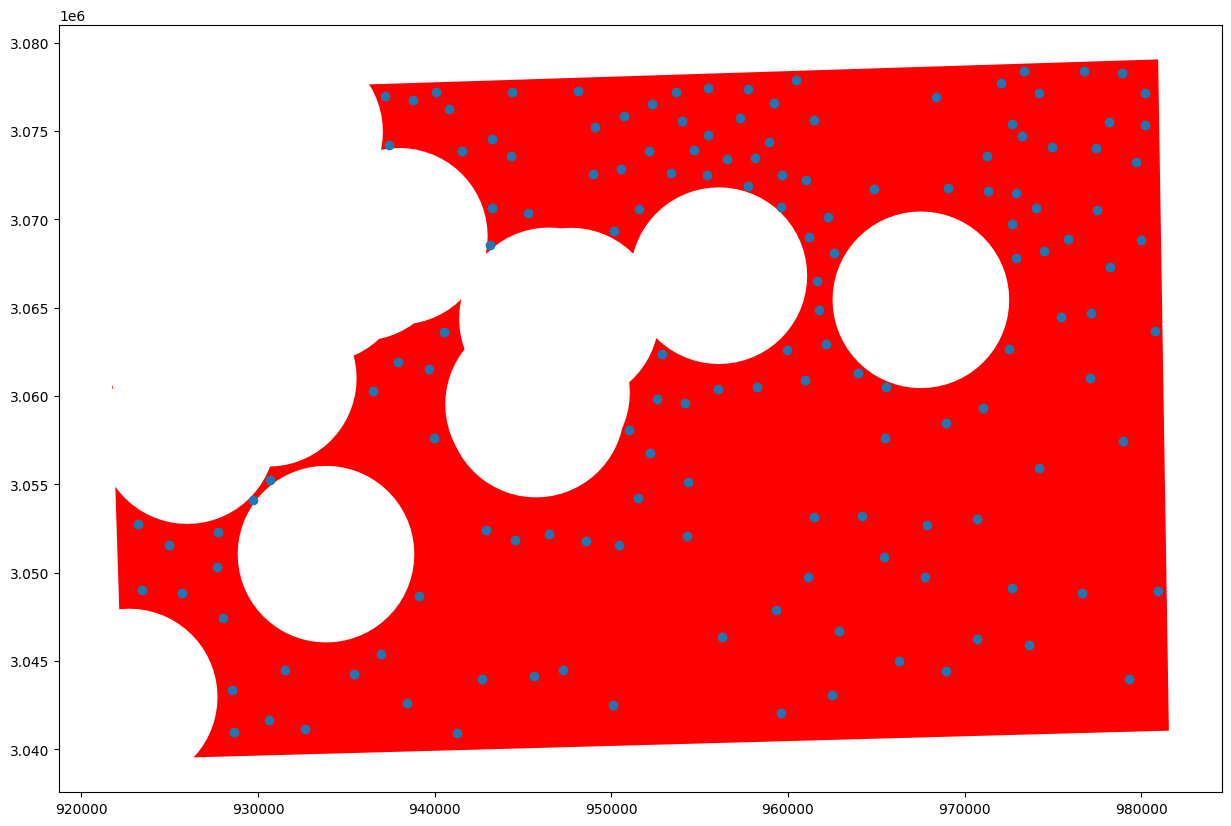

In [462]:
figure,ax=plt.subplots(figsize=(15,15))
non_buffer.plot(ax=ax,color="red")
Locations.to_crs("epsg:32644").plot(ax=ax)

In [463]:
import random as rnd
Locations=Locations.to_crs("epsg:32644")

In [464]:
posi=rnd.randint(0,len(Locations))
buffer=Locations.loc[[posi]].buffer(5000)
loc_in_buffer=gpd.clip(Locations,buffer)

In [465]:
loc_in_buffer=loc_in_buffer.set_index(pd.Index(range(0,len(loc_in_buffer))))
loc_in_buffer

,geometry
0,POINT (941243.617 3040945.156)
1,POINT (938453.864 3042609.458)
2,POINT (942689.592 3043987.952)
3,POINT (945609.269 3044160.528)
4,POINT (947268.088 3044506.168)


In [466]:
list_of_points=[]
for i in range(0,len(loc_in_buffer)):
    list_of_points.append((loc_in_buffer.loc[[i]]['geometry']))

# Taking random area and calculating the number of clusted building under it

<Axes: >

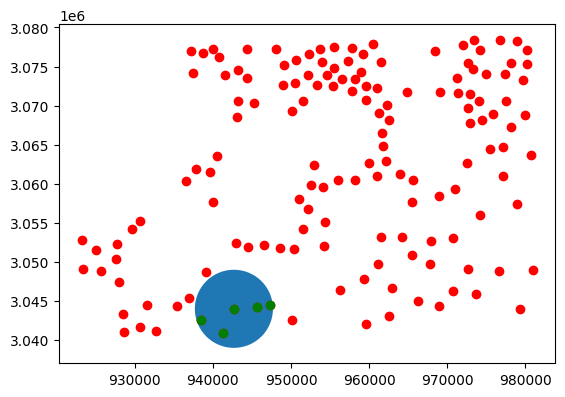

In [468]:
figure,ax=plt.subplots()
buffer.plot(ax=ax)
Locations.plot(ax=ax,color="red")
loc_in_buffer.plot(ax=ax,color="green")

In [469]:
list_of_points

[0    POINT (941243.617 3040945.156)
 Name: geometry, dtype: geometry,
 1    POINT (938453.864 3042609.458)
 Name: geometry, dtype: geometry,
 2    POINT (942689.592 3043987.952)
 Name: geometry, dtype: geometry,
 3    POINT (945609.269 3044160.528)
 Name: geometry, dtype: geometry,
 4    POINT (947268.088 3044506.168)
 Name: geometry, dtype: geometry]

In [470]:
Locations

,geometry
0,POINT (957750.562 3077376.637)
1,POINT (935405.176 3044284.137)
2,POINT (978204.388 3067294.212)
3,POINT (950421.245 3051588.473)
4,POINT (941550.200 3073884.002)
...,...
145,POINT (977510.875 3070540.099)
146,POINT (959577.633 3070705.642)
147,POINT (953985.448 3075576.929)
148,POINT (962587.684 3068117.236)


In [471]:
# Locations=Locations.to_crs("epsg:32644")

In [472]:
xInLoc= Locations.geometry.x
yInLoc= Locations.geometry.y
d={'x':xInLoc,'y':yInLoc}
data=pd.DataFrame(data=d)
data

,x,y
0,957750.562208,3.077377e+06
1,935405.176185,3.044284e+06
2,978204.387722,3.067294e+06
3,950421.245493,3.051588e+06
4,941550.199561,3.073884e+06
...,...,...
145,977510.875020,3.070540e+06
146,959577.632664,3.070706e+06
147,953985.448003,3.075577e+06
148,962587.684332,3.068117e+06


# Using DBScan to remove the outliers and finding where the hospitals should be placed

In [493]:
dbscan = DBSCAN(eps =3000, min_samples =4).fit(data)
dbscan

DBSCAN(eps=3000, min_samples=4)

In [494]:
dbscan.labels_

array([ 0, -1,  1,  3,  2, -1, -1,  1,  4,  0, -1,  0,  1,  3, -1, -1,  0,
        0,  1,  0,  1, -1,  2,  5, -1,  4, -1,  0,  0, -1, -1,  6,  0, -1,
       -1, -1,  1,  5, -1,  1, -1, -1, -1,  6,  0,  0, -1,  0, -1,  0,  1,
        1, -1,  0,  2,  0,  1, -1,  0,  4, -1,  1,  1,  3, -1,  0, -1, -1,
       -1,  2, -1,  0,  1,  1, -1, -1,  5,  0,  0, -1, -1, -1,  5, -1,  0,
        0,  0, -1,  2,  0,  1,  1, -1, -1,  0,  0, -1,  2, -1,  4,  0, -1,
        4, -1, -1,  4, -1,  5,  1,  3, -1,  0, -1,  1,  6, -1,  0,  2,  4,
        1, -1, -1,  0,  4,  1,  1,  0,  1, -1,  0,  0, -1,  1, -1,  0,  1,
        1, -1,  2,  3, -1, -1,  0,  0,  2,  1,  0,  0,  0, -1],
      dtype=int64)

In [495]:
type(dbscan)

sklearn.cluster._dbscan.DBSCAN

In [496]:
dbscan.fit_predict(data)

array([ 0, -1,  1,  3,  2, -1, -1,  1,  4,  0, -1,  0,  1,  3, -1, -1,  0,
        0,  1,  0,  1, -1,  2,  5, -1,  4, -1,  0,  0, -1, -1,  6,  0, -1,
       -1, -1,  1,  5, -1,  1, -1, -1, -1,  6,  0,  0, -1,  0, -1,  0,  1,
        1, -1,  0,  2,  0,  1, -1,  0,  4, -1,  1,  1,  3, -1,  0, -1, -1,
       -1,  2, -1,  0,  1,  1, -1, -1,  5,  0,  0, -1, -1, -1,  5, -1,  0,
        0,  0, -1,  2,  0,  1,  1, -1, -1,  0,  0, -1,  2, -1,  4,  0, -1,
        4, -1, -1,  4, -1,  5,  1,  3, -1,  0, -1,  1,  6, -1,  0,  2,  4,
        1, -1, -1,  0,  4,  1,  1,  0,  1, -1,  0,  0, -1,  1, -1,  0,  1,
        1, -1,  2,  3, -1, -1,  0,  0,  2,  1,  0,  0,  0, -1],
      dtype=int64)

In [497]:

Locations["label"] = dbscan.labels_

In [498]:
labels= dbscan.labels_

In [499]:
Locations['label']=labels
data['label']=labels


In [500]:
temp=data.copy()
temp=temp.groupby('label').mean()
temp=temp.loc[1:]
temp=temp.set_index(pd.Index(range(0,len(temp))))
x_cord=temp['x']
y_cord=temp['y']
geometry=[]
for i in range(len(x_cord)):
    xPoint=gm.Point(x_cord[i],y_cord[i])
    geometry.append(xPoint)
new=gpd.GeoDataFrame({'geometry':geometry})

# Hospitals that should be placed

<Axes: >

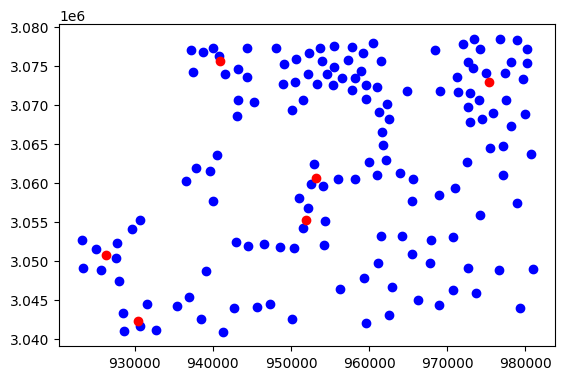

In [506]:
figure,ax=plt.subplots()
Locations.plot(ax=ax,color="blue")
new.plot(ax=ax,color="red")